<a href="https://colab.research.google.com/github/phani0011/cognifiz_internship/blob/cognifiz/Task4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
df = pd.read_csv("Dataset .csv")

In [ ]:
df = df.dropna(subset=["Latitude", "Longitude"])

In [ ]:
map_center = [df["Latitude"].mean(), df["Longitude"].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=5)

In [ ]:
for _, row in df.iterrows():
    folium.CircleMarker(
        location=(row["Latitude"], row["Longitude"]),
        radius=2,
        color="blue",
        fill=True,
        fill_opacity=0.6
    ).add_to(restaurant_map)

In [ ]:
restaurant_map.save("restaurant_distribution_map.html")
print("✅ Interactive map saved as 'restaurant_distribution_map.html'")

✅ Interactive map saved as 'restaurant_distribution_map.html'


<ipython-input-7-003ff512b098>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette="viridis")


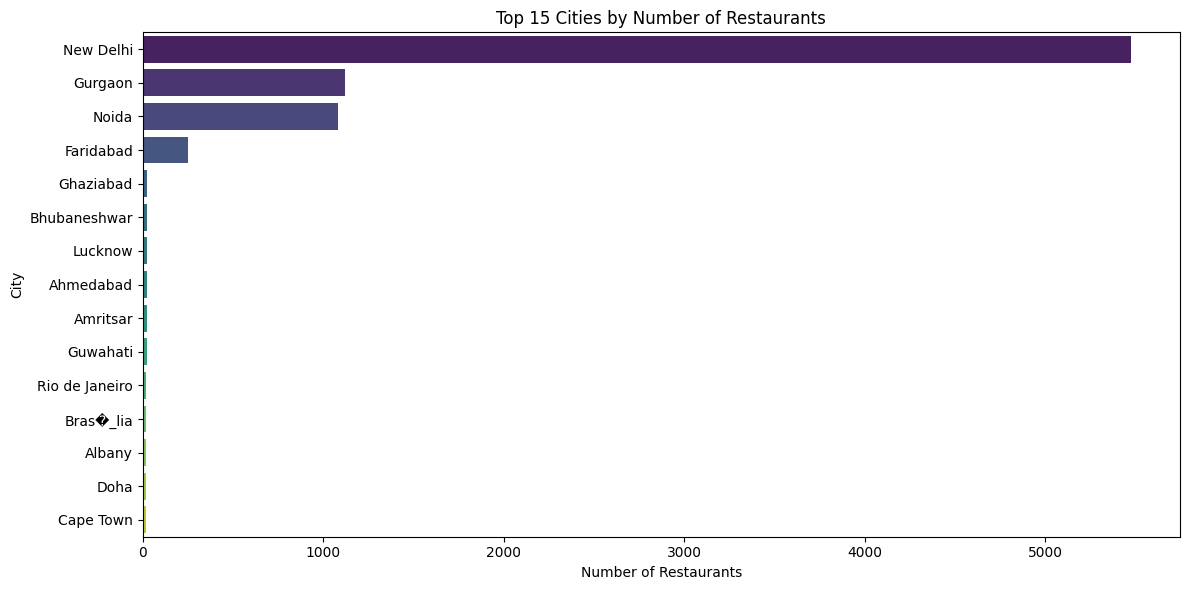

In [ ]:
city_counts = df["City"].value_counts().head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=city_counts.values, y=city_counts.index, palette="viridis")
plt.title("Top 15 Cities by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.tight_layout()
plt.show()

In [ ]:
agg_stats = df.groupby("City")[["Aggregate rating", "Price range", "Average Cost for two"]].mean().sort_values(by="Aggregate rating", ascending=False)
print("\n📊 Average Ratings and Price Range by City:\n")
print(agg_stats.head(10))


📊 Average Ratings and Price Range by City:

                  Aggregate rating  Price range  Average Cost for two
City                                                                 
Inner City                4.900000         4.00           1120.000000
Quezon City               4.800000         3.00            800.000000
Makati City               4.650000         3.00           1150.000000
Pasig City                4.633333         3.00            933.333333
Mandaluyong City          4.625000         3.75           2000.000000
Beechworth                4.600000         2.00             20.000000
London                    4.535000         3.00             64.500000
Taguig City               4.525000         3.50           1725.000000
Secunderabad              4.500000         2.00            825.000000
Lincoln                   4.500000         2.00             25.000000


In [ ]:
df = df.dropna(subset=["Cuisines"])
df["Cuisine List"] = df["Cuisines"].apply(lambda x: [c.strip() for c in x.split(",")])

<ipython-input-9-eddc5e14b0fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cuisine List"] = df["Cuisines"].apply(lambda x: [c.strip() for c in x.split(",")])


In [ ]:
exploded = df.explode("Cuisine List")
cuisine_by_city = exploded.groupby(["City", "Cuisine List"]).size().reset_index(name="Count")

In [ ]:
top_cities = city_counts.index[:3]
for city in top_cities:
    print(f"\n🍽️ Top Cuisines in {city}:\n")
    top_cuisines = cuisine_by_city[cuisine_by_city["City"] == city].sort_values("Count", ascending=False).head(5)
    print(top_cuisines[["Cuisine List", "Count"]])


🍽️ Top Cuisines in New Delhi:

      Cuisine List  Count
1217  North Indian   2425
1178       Chinese   1638
1185     Fast Food   1304
1213       Mughlai    628
1168        Bakery    465

🍽️ Top Cuisines in Gurgaon:

     Cuisine List  Count
753  North Indian    508
721       Chinese    324
726     Fast Food    220
750       Mughlai    117
710        Bakery    110

🍽️ Top Cuisines in Noida:

      Cuisine List  Count
1274  North Indian    532
1251       Chinese    384
1255     Fast Food    265
1273       Mughlai    156
1244        Bakery     93
